# Projeto Final de IA 2

Aldemir Melo Rocha Filho

Darlysson Olímpio Nascimento

Derek Nielsen Araújo Alves


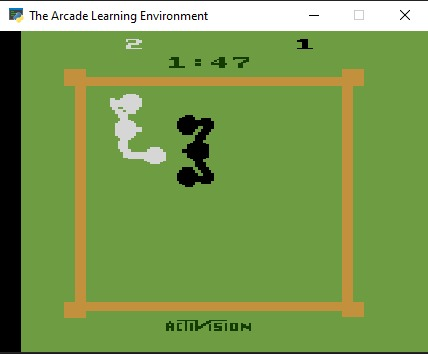

In [ ]:
#!pip install gym
#!pip install cmake
#!pip install -f https://github.com/Kojoley/atari-py/releases atari_py
#!pip install gym[atari]
#!pip install gym[accept-rom-license]

In [ ]:
import atari_py
import gym
import random
import numpy as np
from statistics import mean
import math

In [ ]:
!python -m atari_py.import_roms "./Roms"

copying boxing.bin from ./Roms/Boxing.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/boxing.bin


In [ ]:
#env = gym.make("Boxing-ram-v0", render_mode ='human')
env = gym.make("Boxing-ram-v0")

In [ ]:
class Boxing: 
    def __init__(self, actions, epsilon, alpha, gamma, q_values, rewards, epsilon_decay, prior_reward):
        self.q_table = {}
        self.epsilon = epsilon
        self.alpha = alpha  
        self.gamma = gamma  
        self.q_values = []
        self.actions = actions
        self.rewards = []
        self.epsilon_decay = epsilon_decay
        self.prior_reward = prior_reward
    def QLearning(self, curr_state, action, reward, fut_state): 
        
        max_future_q_list = []
        for action in self.actions:
            max_future_q_list.append(self.q_table.get((fut_state, action), 0.0))

        max_future_q = max(max_future_q_list)

        current_q = self.q_table.get((curr_state, action), 0.0)
        
        if current_q == 0.0:
            self.q_table[(curr_state, action)] = reward
            self.q_values.append(reward)
            return
        
        # Q(s, a) =  Q(s, a) + alpha * (reward(s,a) + max(Q(s') - Q(s,a))
        value = current_q + self.alpha * ((reward + self.gamma*max_future_q) - current_q)
        self.q_table[(curr_state, action)] = value
        self.q_values.append(value)
        
    def chooseAction(self, state):
    
        max_actions = []
        q_value_state = [] 
        for action in self.actions: 
            q_value_state.append(self.q_table.get((state, action), 0.0))
        
        Max_Q_Value = max(q_value_state)
        
        if np.random.uniform(0,1) < self.epsilon: 
            action = env.action_space.sample() 
            return action
        else: #Tomando ação coordenada - contamos os valores máximos dentro da tabela e tomamos um índice aleatório da lista desses valores, com isso não se cria um inviezamento baseado no índice
            max_values = q_value_state.count(Max_Q_Value)
            if max_values > 1:
                for i in range(len(self.actions)):
                    if q_value_state[i] == Max_Q_Value:
                        max_actions.append(i)
                action_index = random.choice(max_actions)
            else:
                action_index = q_value_state.index(Max_Q_Value)
            action = self.actions[action_index]

        return action

In [ ]:
#Cocatena os valores da observação para criar um estado definido
def new_state(observation):
  obs_list = []
  for i in range(len(observation)):
    obs_list.append(str(int(observation[i])))
  x = int("".join(obs_list))
  
  return x


In [ ]:
def run_episodes(Q, episode):
    
    rewards = 0
    done = False
    s1 = env.reset()

    while not done:
        
        state1 = new_state(s1)
        action = Q.chooseAction(state1) 

        s2, reward, done, info = env.step(action) 
        state2 = new_state(s2)
        Q.QLearning(state1, action, reward, state2)

        rewards += reward
        s1 = s2
    
    Q.rewards.append(rewards)    
    #Decaimento do epsilon
    if Q.epsilon > 0.05:
      if rewards > Q.prior_reward and episode > 10:
        print("rewards = ", rewards, "Q.prior_reward = ", Q.prior_reward)
        #Q.epsilon = Q.epsilon - math.pow(Q.epsilon_decay, episode - 10)
        Q.epsilon = Q.epsilon - Q.epsilon_decay
        print("epsilon = ", Q.epsilon)
    Q.prior_reward = rewards
    print("Episódio ", episode, " Recompensa = ", rewards)
      

    

In [ ]:
actions = list(range(0, 18)) #Espaço de ação padrão do atari, de 0 a 18
epsilon = 0.5   
alpha = 0.6
gamma = 0.95
epsilon_decay = 0.01 
q_values = []
rewards_list = []
prior_reward = 0
Q = Boxing(actions, epsilon, alpha, gamma, q_values, rewards_list, epsilon_decay, prior_reward)

for episodio in range(1, 101):
    run_episodes(Q, episodio)

rec_mean_1 = mean(Q.rewards)
for i in range(len(Q.rewards)):
  print("Episódio = ", i+1, "Recompensa = ", Q.rewards[i])
print("Recompensa média = ", rec_mean_1)


Episódio  1  Recompensa =  -1.0
Episódio  2  Recompensa =  -1.0
Episódio  3  Recompensa =  -14.0
Episódio  4  Recompensa =  2.0
Episódio  5  Recompensa =  -11.0
Episódio  6  Recompensa =  -2.0
Episódio  7  Recompensa =  0.0
Episódio  8  Recompensa =  10.0
Episódio  9  Recompensa =  3.0
Episódio  10  Recompensa =  -1.0
Episódio  11  Recompensa =  -2.0
Episódio  12  Recompensa =  -2.0
rewards =  -1.0 Q.prior_reward =  -2.0
epsilon =  0.49
Episódio  13  Recompensa =  -1.0
Episódio  14  Recompensa =  -1.0
Episódio  15  Recompensa =  -3.0
rewards =  9.0 Q.prior_reward =  -3.0
epsilon =  0.48
Episódio  16  Recompensa =  9.0
Episódio  17  Recompensa =  2.0
Episódio  18  Recompensa =  -1.0
rewards =  0.0 Q.prior_reward =  -1.0
epsilon =  0.47
Episódio  19  Recompensa =  0.0
Episódio  20  Recompensa =  -5.0
rewards =  0.0 Q.prior_reward =  -5.0
epsilon =  0.45999999999999996
Episódio  21  Recompensa =  0.0
Episódio  22  Recompensa =  -1.0
Episódio  23  Recompensa =  -7.0
rewards =  0.0 Q.prior_

In [ ]:
Q.epsilon = 0.3
Q.alpha = 0.318
Q.gamma = 0.4
Q.q_values = []
Q.rewards = []
Q.epsilon_decay = 0.05
for episodio in range(1, 101):
    run_episodes(Q, episodio)

rec_mean_2 = mean(Q.rewards)
for i in range(len(Q.rewards)):
  print("Episódio = ", i+1, "Recompensa = ", Q.rewards[i])
print("Recompensa média = ", rec_mean_2)

Episódio  1  Recompensa =  5.0
Episódio  2  Recompensa =  -6.0
Episódio  3  Recompensa =  3.0
Episódio  4  Recompensa =  10.0
Episódio  5  Recompensa =  3.0
Episódio  6  Recompensa =  -1.0
Episódio  7  Recompensa =  -1.0
Episódio  8  Recompensa =  3.0
Episódio  9  Recompensa =  -2.0
Episódio  10  Recompensa =  5.0
Episódio  11  Recompensa =  -2.0
rewards =  5.0 Q.prior_reward =  -2.0
epsilon =  0.25
Episódio  12  Recompensa =  5.0
Episódio  13  Recompensa =  0.0
rewards =  8.0 Q.prior_reward =  0.0
epsilon =  0.2
Episódio  14  Recompensa =  8.0
Episódio  15  Recompensa =  -2.0
rewards =  0.0 Q.prior_reward =  -2.0
epsilon =  0.15000000000000002
Episódio  16  Recompensa =  0.0
Episódio  17  Recompensa =  -2.0
rewards =  -1.0 Q.prior_reward =  -2.0
epsilon =  0.10000000000000002
Episódio  18  Recompensa =  -1.0
rewards =  2.0 Q.prior_reward =  -1.0
epsilon =  0.05000000000000002
Episódio  19  Recompensa =  2.0
Episódio  20  Recompensa =  -1.0
rewards =  5.0 Q.prior_reward =  -1.0
epsilon

Aplicando os parâmetros acima o agente tende a perder menos